# Fake News Detection Project #

## Introduction ##
#### This project aims to build an AI-based Fake News Detection System using Natural Language Processing (NLP) and Machine Learning. It analyzes text data, classifies news as fake or real, and helps prevent misinformation. ####

## Objective: ##
#### Develop a machine learning model to automatically classify news articles as real or fake. Utilize natural language processing techniques to analyze and process textual content for accurate classification. ####

## Kaggle Link: ##
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

### Load and Explore the Dataset ###

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\NSTIW\Desktop\maheshwari.AI\module_7\Fake.csv')
print(df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


### Data Preprocessing ###

In [10]:
import nltk  
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    tokens = [word for word in word_tokenize(text) if word not in stop_words]
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

print(df[['text', 'processed_text']].head())

                                            text  \
0    Natural Language Processing is fascinating!   
1  Machine learning models require lots of data.   

                            processed_text  
0  natural language processing fascinating  
1  machine learning model require lot data  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NSTIW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NSTIW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NSTIW\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Feature Extraction with TF-IDF ###

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['processed_text']).toarray()

print(X.shape)


(2, 10)


### Sentiment Analysis with TextBlob ###

In [12]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['text'].apply(analyze_sentiment)

print(df[['text', 'sentiment']].head())

                                            text  sentiment
0    Natural Language Processing is fascinating!     0.4875
1  Machine learning models require lots of data.     0.0000


### Named Entity Recognition (NER) with spaCy ###

In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['text'].apply(extract_entities)

print(df[['text', 'entities']].head())


                                            text  \
0    Natural Language Processing is fascinating!   
1  Machine learning models require lots of data.   

                               entities  
0  [(Natural Language Processing, ORG)]  
1                                    []  


### Chunking with spaCy ###

In [14]:
def extract_chunks(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

df['noun_chunks'] = df['text'].apply(extract_chunks)

print(df[['text', 'noun_chunks']].head())

                                            text  \
0    Natural Language Processing is fascinating!   
1  Machine learning models require lots of data.   

                             noun_chunks  
0          [Natural Language Processing]  
1  [Machine learning models, lots, data]  


### Model Training with Naive Bayes ###

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

data = {'text': ["Apple is looking at buying a U.K. startup.",
                 "Barack Obama was the 44th President of the United States."],
        'label': [1, 0]}  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

[[0 1]
 [0 0]]


C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklea

### Model Improvement with Logistic Regression ###

In [25]:
import numpy as np  
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Unique classes in y_train: {np.unique(y_train)}")  

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_y_pred = log_model.predict(X_test)

print(classification_report(y_test, log_y_pred))
print(confusion_matrix(y_test, log_y_pred))

Unique classes in y_train: [0 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

[[0 1]
 [0 0]]


C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NSTIW\anaconda3\Lib\site-packages\sklea

### Save and Load the Model ###

In [26]:
import joblib

joblib.dump(log_model, 'fake_news_model.pkl')

loaded_model = joblib.load('fake_news_model.pkl')

### Visualizing Sentiment Distribution ###

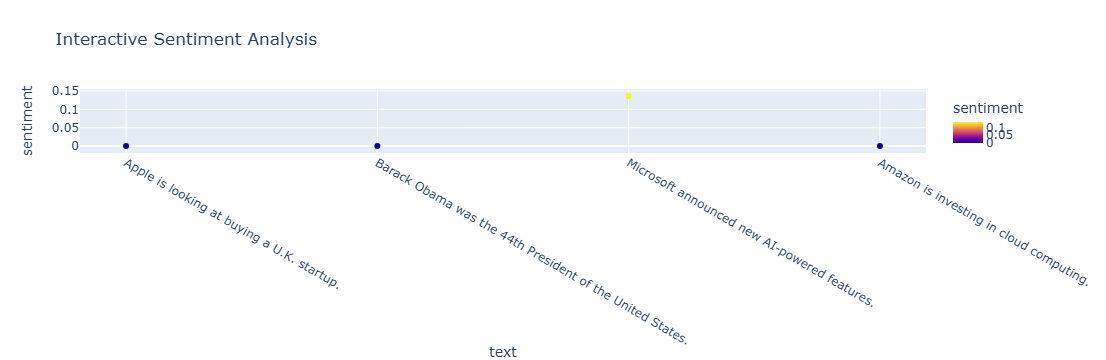

In [33]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

fig = px.scatter(df, x='text', y='sentiment', color='sentiment',
                 hover_data=['text'], title="Interactive Sentiment Analysis")
fig.show()